In [1]:
# import libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
from dfply import *
import pandas as pd
from sklearn import preprocessing

In [2]:
# load data
credit = pd.read_csv('default of credit card clients copy.csv', header =1)

# Investigate structure of the dataset

In [3]:
# look at the amount of observations and columns
credit.shape 

(30000, 25)

In [4]:
# investigate how the dataframe looks like
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# look at the info, what kind of class are the columns?
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
# show the dataframe head and tail, .info() will give you structural info
credit.info 

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
5          6      50000    1          1         2   37      0      0      0   
6          7     500000    1          1         2   29      0      0      0   
7          8     100000    2          2         2   23      0     -1     -1   
8          9     140000    2          3         1   28      0      0      2   
9         10      20000    1          3         2   35     -2     -2     -2   
10        11     200000    2          3         2   34      0      0      2   
11        12     260

# Rename features and values for more clarity

In [7]:
# rename the columns for clarity
credit.rename(columns={'PAY_0':'DELAY_SEP',
                       'PAY_2':'DELAY_AUG',
                       'PAY_3':'DELAY_JUL',
                       'PAY_4':'DELAY_JUN',
                       'PAY_5':'DELAY_MAY',
                       'PAY_6':'DELAY_APR',
                       'BILL_AMT1':'BILL_SEP',
                       'BILL_AMT2':'BILL_AUG',
                       'BILL_AMT3':'BILL_JUL',
                       'BILL_AMT4':'BILL_JUN',
                       'BILL_AMT5':'BILL_MAY',
                       'BILL_AMT6':'BILL_APR',
                       'PAY_AMT1':'PAID_SEP',
                       'PAY_AMT2':'PAID_AUG',
                       'PAY_AMT3':'PAID_JUL',
                       'PAY_AMT4':'PAID_JUN',
                       'PAY_AMT5':'PAID_MAY',
                       'PAY_AMT6':'PAID_APR', 
                        'default payment next month':'DEFAULT'},
                 inplace=True)
 
print(credit.columns)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'DELAY_SEP',
       'DELAY_AUG', 'DELAY_JUL', 'DELAY_JUN', 'DELAY_MAY', 'DELAY_APR',
       'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR',
       'PAID_SEP', 'PAID_AUG', 'PAID_JUL', 'PAID_JUN', 'PAID_MAY', 'PAID_APR',
       'DEFAULT'],
      dtype='object')


In [8]:
# use .drop() to drop ID from dataframe
credit = credit.drop('ID', axis=1) 

In [9]:
# blocking the 'settingwithcopy' warning from pandas
pd.options.mode.chained_assignment = None

# sex
credit.SEX[credit.SEX == 1] = 'Male'
credit.SEX[credit.SEX == 2] = 'Female'

# change the values in EDUCATION (0,4-6= Other)
credit.EDUCATION[credit.EDUCATION == 0] = 'Other'
credit.EDUCATION[credit.EDUCATION == 1] = 'Graduate School'
credit.EDUCATION[credit.EDUCATION == 2] = 'University'
credit.EDUCATION[credit.EDUCATION == 3] = 'High School'
credit.EDUCATION[credit.EDUCATION == 4] = 'Other'
credit.EDUCATION[credit.EDUCATION == 5] = 'Other'
credit.EDUCATION[credit.EDUCATION == 6] = 'Other'

# change the values in MARRIAGE (3= divorced 4 = other
credit.MARRIAGE[credit.MARRIAGE == 0] = 'Other'
credit.MARRIAGE[credit.MARRIAGE == 1] = 'Married'
credit.MARRIAGE[credit.MARRIAGE == 2] = 'Single'
credit.MARRIAGE[credit.MARRIAGE == 3] = 'Divorced'

# change the values of delay columns into category
for col in ['DELAY_APR', 'DELAY_MAY', 'DELAY_JUN', 'DELAY_JUL', 'DELAY_AUG', 'DELAY_SEP']:
    credit[col] = credit[col].astype('category')

# change the values in DEFAULT (0= No, 1 = Yes
credit.DEFAULT[credit.DEFAULT == 0] = 'No'
credit.DEFAULT[credit.DEFAULT == 1] = 'Yes'

# Explore the data with descriptive statistics and visuals
### Start with the trend in average amount of bills and average amount of payments

In [10]:
# use .describe() to print summary or descriptive statistics
credit.describe()


,LIMIT_BAL,AGE,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [11]:
# create a df with the means of the bills and payments to see overall trend
means_df = pd.DataFrame({'MONTH': {0: 'APRIL', 1: 'MAY', 2: 'JUNE', 3: 'JULY', 4: 'AUGUST', 5: 'SEPTEMBER'},
                      'MEAN_BILL': {0: 38872, 1: 40311, 2: 43263, 3: 47013, 4: 43263, 5: 51223},
                      'MEAN_PAID': {0: 5216, 1: 4799, 2: 4826, 3: 5226, 4: 5921, 5: 5664}})

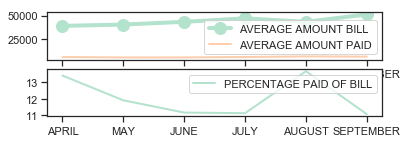

In [12]:
# plot two graphs in one figure
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="ticks", palette='Pastel2')



# plot the means in a multiple line plot
plt.subplot(4,1,1)
plt.plot( 'MONTH', 'MEAN_BILL', data=means_df, marker='o', markersize=12, linewidth=4, label="AVERAGE AMOUNT BILL")
plt.plot( 'MONTH', 'MEAN_PAID', data=means_df, marker='', linewidth=2, label="AVERAGE AMOUNT PAID")
plt.legend()

# calculate the percentages of the bill paid on average and visualize
plt.subplot(4,1,2)
means_df['PAID/BILL'] = means_df['MEAN_PAID']/means_df['MEAN_BILL']*100
plt.plot( 'MONTH', 'PAID/BILL', data=means_df, linewidth=2, label="PERCENTAGE PAID OF BILL")
plt.legend()

# suggestion: remove the outliers to see how the it changes

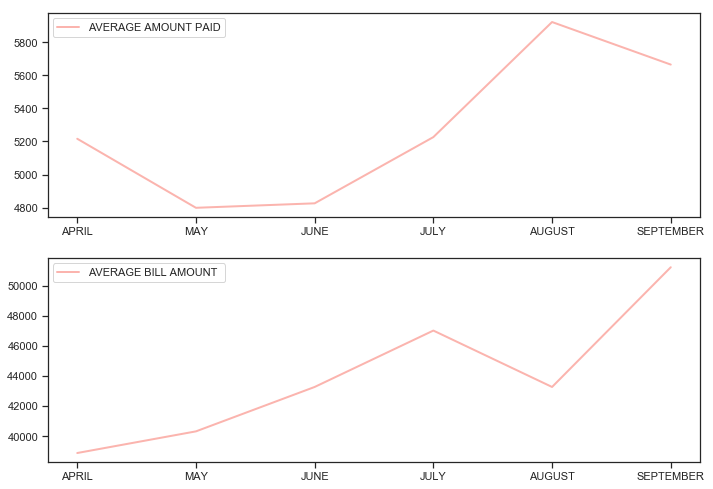

In [13]:
# plot two graphs in one figure
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="ticks", palette='Pastel1')

# plot the average amount paid in a single plot
plt.subplot(2,1,1)
plt.plot( 'MONTH', 'MEAN_PAID', data=means_df, linewidth=2, label="AVERAGE AMOUNT PAID")
plt.legend()

# plot the average bill amount  in a single plot
plt.subplot(2,1,2)
plt.plot( 'MONTH', 'MEAN_BILL', data=means_df, linewidth=2, label="AVERAGE BILL AMOUNT ")
plt.legend()

### Explore the relationship between DEFAULT and other features

In [14]:
# Number of people classified as DEFAULT
credit.groupby('DEFAULT')['DEFAULT'].count()

DEFAULT
No     23364
Yes     6636
Name: DEFAULT, dtype: int64

In [15]:
# calculate the percentages of people that classified as default
defaulters = credit.groupby('DEFAULT')['DEFAULT'].count()
print('Percentage default =', (defaulters[1] / len(credit)))
print('Percentage no default =', (defaulters[0] / len(credit)))

Percentage default = 0.2212
Percentage no default = 0.7788


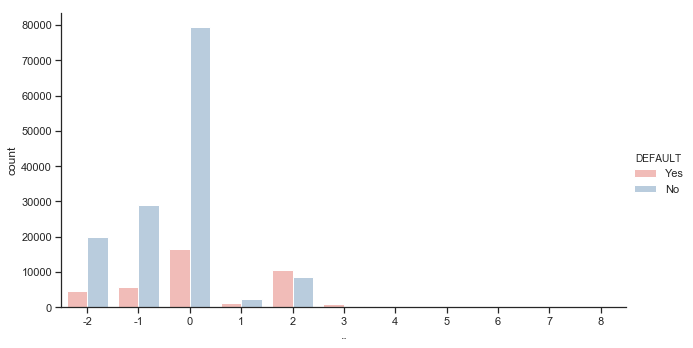

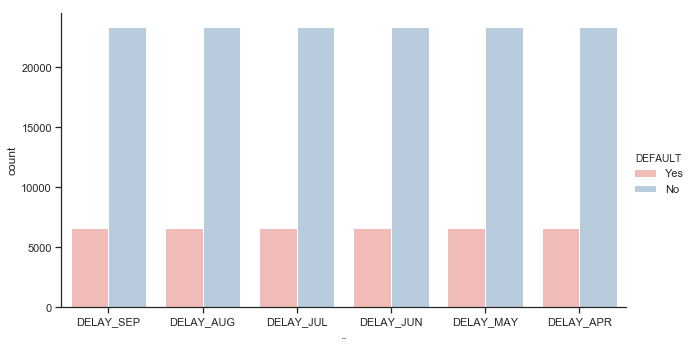

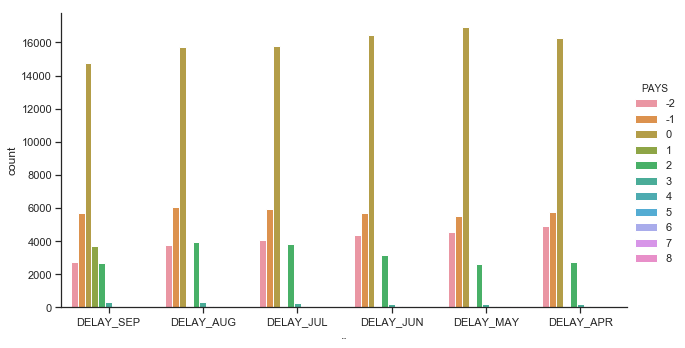

In [16]:
# visualize the relationship between PAYMENY STATUS (-2 tm 8+) and DEFAULT
status_default = pd.melt(credit, id_vars=['DEFAULT'], 
        value_vars=['DELAY_SEP','DELAY_AUG','DELAY_JUL','DELAY_JUN','DELAY_MAY','DELAY_APR'], 
                     var_name='MONTH', value_name='PAYS')

# set the size and the color theme for the collection of graphs
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="ticks", palette='Pastel1')


# Group by PAYMENT STATUS and DEFAULTING
g = sns.catplot('PAYS', data=status_default, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('..')

g = sns.catplot('MONTH', data=status_default, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('..')

g = sns.catplot('MONTH', data=status_default, hue='PAYS', kind='count', aspect=1.75)
g.set_xlabels('..')

In [17]:
# Check payment status of people seperated by sex who are classified as DEFAULT
# Pivot table connot deal with object/categories, so change DEFAULT values back to integers
defaulted = credit[credit['DEFAULT']=='Yes']
defaulted.DEFAULT[defaulted.DEFAULT == 'No'] = 0
defaulted.DEFAULT[defaulted.DEFAULT == 'Yes'] = 1

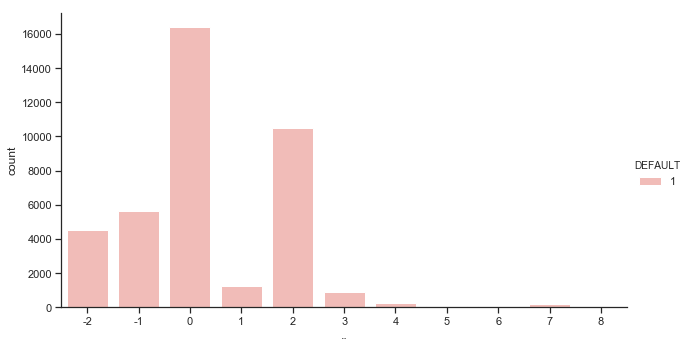

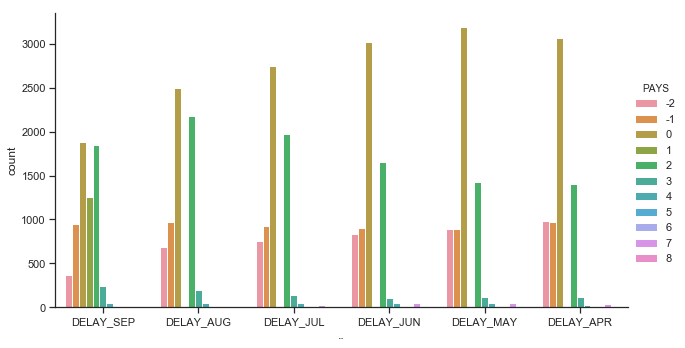

In [18]:
# visualize the relationship between PAYMENY STATUS (-2 tm 8+) and DEFAULT = YES
status_default_yes = pd.melt(defaulted, id_vars=['DEFAULT'], 
        value_vars=['DELAY_SEP','DELAY_AUG','DELAY_JUL','DELAY_JUN','DELAY_MAY','DELAY_APR'], 
                     var_name='MONTH', value_name='PAYS')

# set the size and the color theme for the collection of graphs
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="ticks", palette='Pastel1')


# Group by PAYMENT STATUS and DEFAULTING
g = sns.catplot('PAYS', data=status_default_yes, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('..')

g = sns.catplot('MONTH', data=status_default_yes, hue='PAYS', kind='count', aspect=1.75)
g.set_xlabels('..')

Suggestion for further investigation: why are people classified as defaulting when most of the time they seem to make payments? What else, except for payment status could be a strong indicator for a client to default or not?

### Explore the demographics of CreditOne clients

In [19]:
print(credit['MARRIAGE'].value_counts()) # counts the values in marriage

Single      15964
Married     13659
Divorced      323
Other          54
Name: MARRIAGE, dtype: int64


In [20]:
print(credit['SEX'].value_counts()) # counts the values in sex

Female    18112
Male      11888
Name: SEX, dtype: int64


In [21]:
# calculate the percentages of women and men
male_female = credit.groupby('SEX')['SEX'].count()
print('Percentage Females =', (male_female['Female'] / len(credit)))
print('Percentage Males =', (male_female['Male'] / len(credit)))

Percentage Females = 0.6037333333333333
Percentage Males = 0.39626666666666666


In [22]:
print(credit['EDUCATION'].value_counts()) # counts the values in education

University         14030
Graduate School    10585
High School         4917
Other                468
Name: EDUCATION, dtype: int64


### group by multiple features

In [23]:
# group the data by multiple features
# Number of men and women in each of the education levels
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX     EDUCATION      
Female  Graduate School    6231
        High School        2927
        Other               298
        University         8656
Male    Graduate School    4354
        High School        1990
        Other               170
        University         5374
Name: SEX, dtype: int64

In [24]:
# group the data by multiple features
# Number of men and women in each of the education levels
credit.groupby(['SEX', 'DEFAULT'])['SEX'].count()

SEX     DEFAULT
Female  No         14349
        Yes         3763
Male    No          9015
        Yes         2873
Name: SEX, dtype: int64

In [25]:
# group the data by multiple features
# level of education and the amount of people defaulting or not
credit.groupby(['EDUCATION', 'DEFAULT'])['EDUCATION'].count()

EDUCATION        DEFAULT
Graduate School  No          8549
                 Yes         2036
High School      No          3680
                 Yes         1237
Other            No           435
                 Yes           33
University       No         10700
                 Yes         3330
Name: EDUCATION, dtype: int64

In [26]:
# group the data by multiple features
# Number of men and women in each of the education levels
credit.groupby(['MARRIAGE', 'DEFAULT'])['MARRIAGE'].count()

MARRIAGE  DEFAULT
Divorced  No           239
          Yes           84
Married   No         10453
          Yes         3206
Other     No            49
          Yes            5
Single    No         12623
          Yes         3341
Name: MARRIAGE, dtype: int64

In [27]:
defaulted.pivot_table('DEFAULT', 'SEX', 'DELAY_SEP', aggfunc=np.sum, margins=True)

DELAY_SEP,-2,-1,0,1,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,,
Female,252,564,1024,686,1076,124,20,6,2,3,6,3763
Male,113,390,864,566,768,120,32,7,4,4,5,2873
All,365,954,1888,1252,1844,244,52,13,6,7,11,6636


In [28]:
# Number of people classified as DEFAULT divided by SEX and EDUCATION
defaulted.pivot_table('DEFAULT', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,Graduate School,High School,Other,University,All
SEX,,,,,
Female,1130,692,19,1922,3763
Male,906,545,14,1408,2873
All,2036,1237,33,3330,6636


In [29]:
# distribution of people based on sex and education
credit.pivot_table('DEFAULT', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,Graduate School,High School,Other,University,All
SEX,,,,,
Female,6231,2927,298,8656,18112
Male,4354,1990,170,5374,11888
All,10585,4917,468,14030,30000


In [30]:
# Number of people classified as DEFAULT divided by PAYMENT STATUS SEP and SEX
defaulted.pivot_table('DEFAULT', 'SEX', 'DELAY_SEP', aggfunc=len, margins=True)

DELAY_SEP,-2,-1,0,1,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,,
Female,252,564,1024,686,1076,124,20,6,2,3,6,3763
Male,113,390,864,566,768,120,32,7,4,4,5,2873
All,365,954,1888,1252,1844,244,52,13,6,7,11,6636


In [31]:
# People who defaulted and grouped by sex and education
table = pd.crosstab(index=[credit.DEFAULT,credit.EDUCATION], columns=[credit.SEX])
table.unstack()

SEX                Female                                         Male  \
EDUCATION Graduate School High School Other University Graduate School   
DEFAULT                                                                  
No                   5101        2235   279       6734            3448   
Yes                  1130         692    19       1922             906   

SEX                                     
EDUCATION High School Other University  
DEFAULT                                 
No               1445   156       3966  
Yes               545    14       1408

In [32]:
# People who defaulted and grouped by sex and marriage
table2 = pd.crosstab(index=[credit.DEFAULT,credit.MARRIAGE], columns=[credit.SEX])
table2.unstack()

SEX        Female                          Male                     
MARRIAGE Divorced Married Other Single Divorced Married Other Single
DEFAULT                                                             
No            148    6609    37   7555       91    3844    12   5068
Yes            44    1860     3   1856       40    1346     2   1485

In [33]:
# People who defaulted and grouped by sex and payment status in september
table3 = pd.crosstab(index=[credit.DEFAULT,credit.DELAY_SEP], columns=[credit.SEX])
table3.unstack()

SEX       Female                                           ...  Male        \
DELAY_SEP     -2    -1     0     1     2    3   4  5  6  7 ...    -1     0   
DEFAULT                                                    ...               
No          1636  2990  7682  1510   471   39  12  2  3  1 ...  1742  5167   
Yes          252   564  1024   686  1076  124  20  6  2  3 ...   390   864   

SEX                                        
DELAY_SEP    1    2    3   4   5  6  7  8  
DEFAULT                                    
No         926  352   39  12  11  2  1  5  
Yes        566  768  120  32   7  4  4  5  

[2 rows x 22 columns]

In [36]:
print('Average and median age of people in the whole dataset are %0.f and %0.f years old, respectively'%(credit.AGE.mean(), 
                                                                          credit.AGE.median()))
print('Average and median age of people classified as DEFAULT are %0.f and %0.f years old, respectively'%(defaulted.AGE.mean(), 
                                                                          defaulted.AGE.median()))
print('Average and median credit limit of people in the whole dataset are %0.f and %0.f dollars, respectively'%(credit.LIMIT_BAL.mean(), 
                                                                          credit.LIMIT_BAL.median()))
print('Average and median credit limit of people classified as DEFAULT are %0.f and %0.f dollars, respectively'%(defaulted.LIMIT_BAL.mean(), 
                                                                          defaulted.LIMIT_BAL.median()))


Average and median age of people in the whole dataset are 35 and 34 years old, respectively
Average and median age of people classified as DEFAULT are 36 and 34 years old, respectively
Average and median credit limit of people in the whole dataset are 167484 and 140000 dollars, respectively
Average and median credit limit of people classified as DEFAULT are 130110 and 90000 dollars, respectively


# Visualize the demographics of the dataset

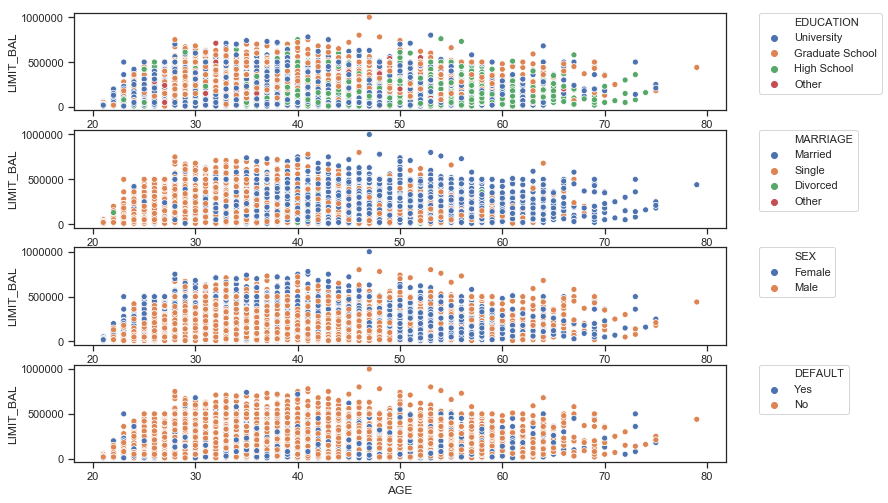

In [37]:
# make a figure with multiple plots of the above distributions along demographics
x = credit['AGE']
y = credit['LIMIT_BAL']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="ticks")
plt.ylabel('Maximum credit', fontsize = 12) # test if this works


plt.figure(1)

plt.subplot(4,1,1)
sns.scatterplot(x, y, hue='EDUCATION', data=credit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Put the legend out of the figure

plt.subplot(4,1,2)
sns.scatterplot(x,y, hue='MARRIAGE', data=credit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

plt.subplot(4,1,3)
sns.scatterplot(x,y, hue='SEX', data=credit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

plt.subplot(4,1,4)
sns.scatterplot(x,y, hue='DEFAULT', data=credit)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

# plt.savefig("investigative.png") # saves figure into .png file 

In [38]:
# create bins for LIMIT_BAL, and divide by 1000
credit['binCREDIT'] = pd.cut(credit['LIMIT_BAL'], 
                             [0,50000,100000, 150000,200000, 250000, 300000, 350000, 
                              400000,450000, 500000, 550000, 600000, 1000000]) # transform credit limits in bins

In [39]:
credit['binCREDIT'] = credit['binCREDIT'].astype('category')

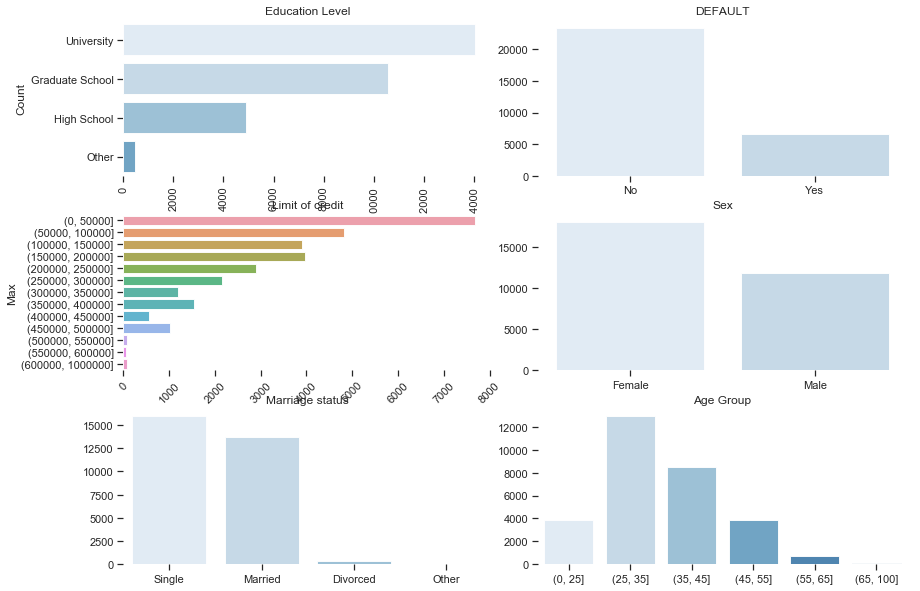

In [40]:
# plot the histograms
# make a figure with multiple plots based on A4 size: sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("paper") # use "talk" to show bigger figures, suitable for presentations
sns.set(style="ticks", palette='Blues')


fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()")


# EDUCATION
plt.subplot(3,2,1)
EDUCATION_count = (credit['EDUCATION'].value_counts())
sns.barplot(y=EDUCATION_count.index,x= EDUCATION_count.values, alpha=0.9)
plt.title('Education Level', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation=90)

# DEFAULT
plt.subplot(3,2,2)
DEFAULT_count = (credit['DEFAULT'].value_counts())
sns.barplot(DEFAULT_count.index, DEFAULT_count.values, alpha=0.9)
plt.title('DEFAULT', fontsize = 12)

# AGE
plt.subplot(3,2,6)
credit['binAGE'] = pd.cut(credit['AGE'], [0, 25, 35,45,55,65,100]) # transform AGE in bins
binAGE_count = (credit['binAGE'].value_counts())
sns.barplot(binAGE_count.index, binAGE_count.values, alpha=0.9)
plt.title('Age Group', fontsize = 12)



# SEX
plt.subplot(3,2,4)
SEX_count = (credit['SEX'].value_counts())
sns.barplot(SEX_count.index, SEX_count.values, alpha=0.9)
plt.title('Sex', fontsize = 12)
plt.ylabel('Count', fontsize = 12)


# MARRIAGE
plt.subplot(3,2,5)
MARRIAGE_count = (credit['MARRIAGE'].value_counts())
sns.barplot(MARRIAGE_count.index, MARRIAGE_count.values, alpha=0.9)
plt.title('Marriage status', fontsize = 12)



# LIMIT
plt.subplot(3,2,3)
binCREDIT_count = (credit['binCREDIT'].value_counts())
sns.barplot(y=binCREDIT_count.index, x=binCREDIT_count.values, alpha=0.9)
plt.title('Limit of credit', fontsize = 12)
plt.ylabel('Max', fontsize = 12)
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)






plt.savefig("demographics.png") # saves figure into .png file

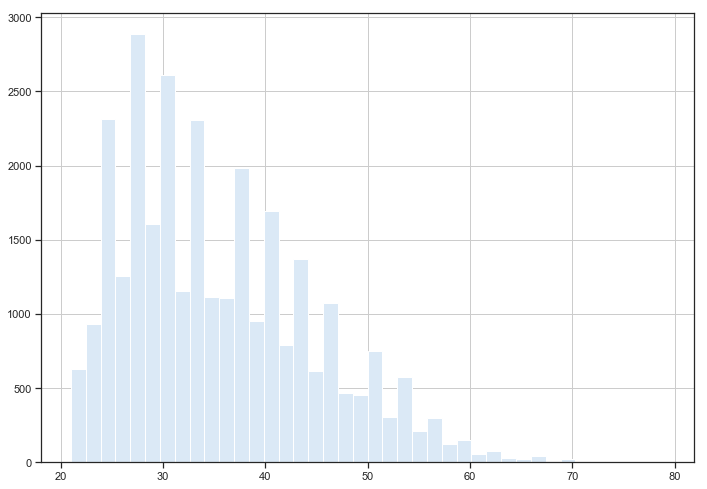

In [41]:
# Another way to plot a histogram of ages is shown below
credit['AGE'].hist(bins=40)

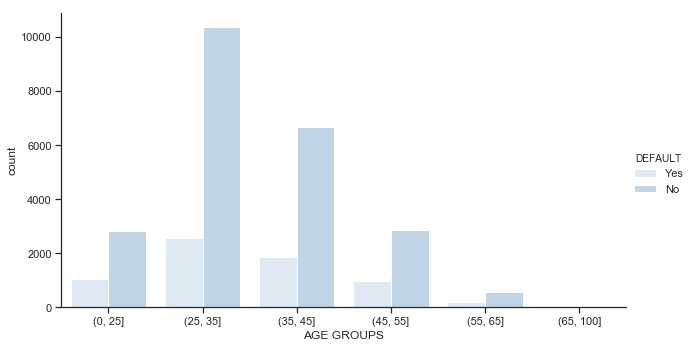

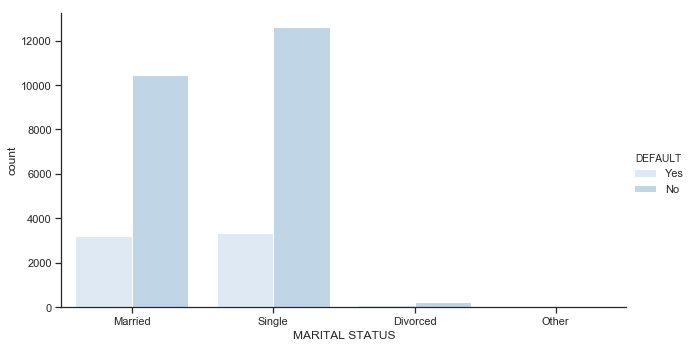

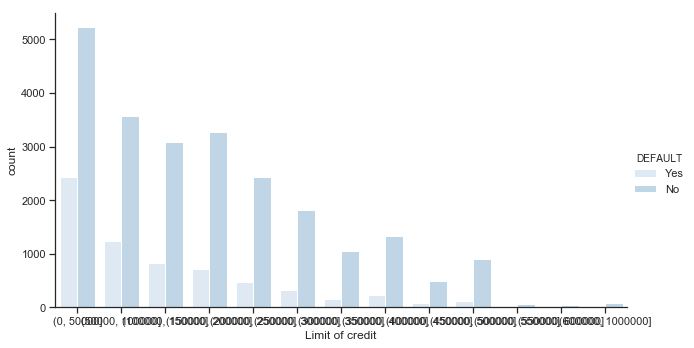

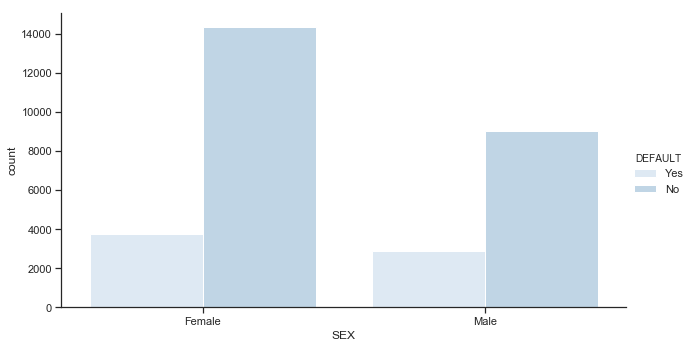

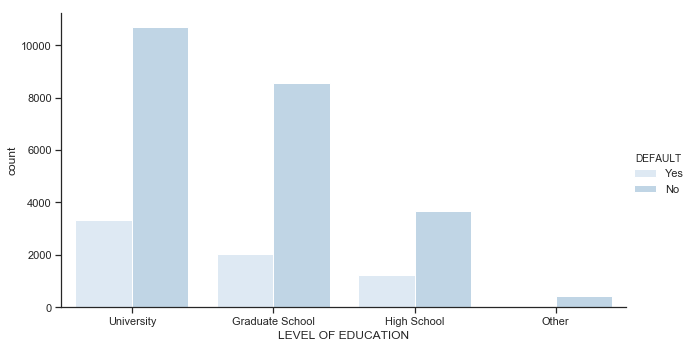

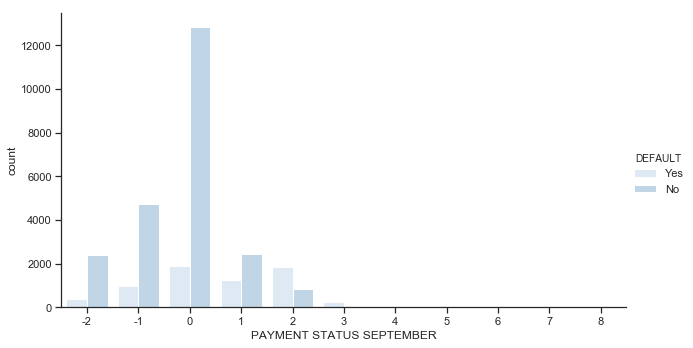

In [42]:
# set the size and the color theme for the collection of graphs
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="ticks", palette='Blues')


# Group by SEX and EDUCATION

g = sns.catplot('binAGE', data=credit, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('AGE GROUPS')

# Group by LIMIT and SEX

g = sns.catplot('MARRIAGE', data=credit, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('MARITAL STATUS')

# Group by LIMIT and DEFAULT

g = sns.catplot('binCREDIT', data=credit, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('Limit of credit')

# Group by SEX and EDUCATION

g = sns.catplot('SEX', data=credit, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('SEX')

# Group by DEFAULT and EDUCATION

g = sns.catplot('EDUCATION', data=credit, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('LEVEL OF EDUCATION')

# Group by SEX and EDUCATION

g = sns.catplot('DELAY_SEP', data=credit, hue='DEFAULT', kind='count', aspect=1.75)
g.set_xlabels('PAYMENT STATUS SEPTEMBER')

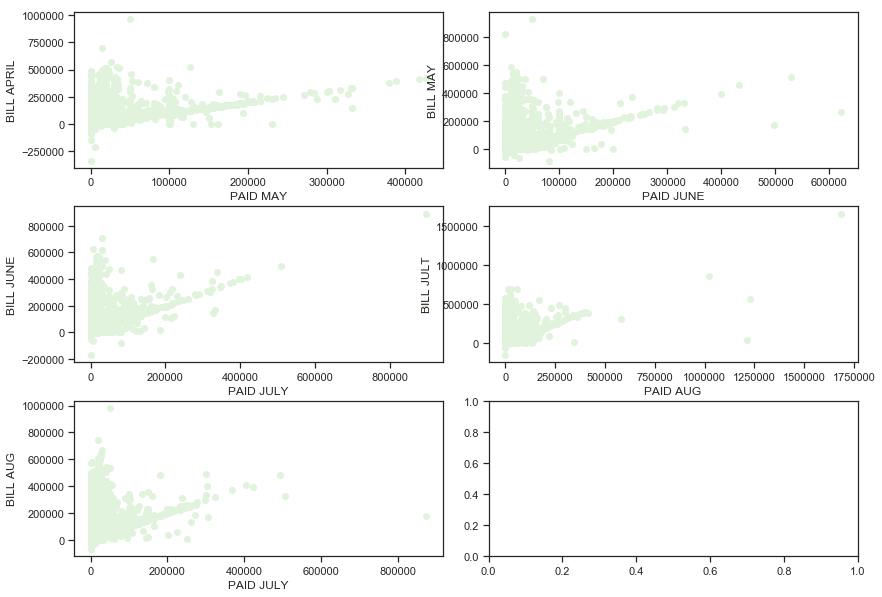

In [43]:
# make scatterplots to investigate the relation between paid amount in M (month) and bill amount in M-1.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="ticks", palette='Greens')


fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()")



plt.subplot(3,2,1)
x = credit['PAID_MAY']
y = credit['BILL_APR']
plt.scatter(x,y)
plt.ylabel('BILL APRIL', fontsize = 12)
plt.xlabel('PAID MAY', fontsize = 12)

plt.subplot(3,2,2)
x = credit['PAID_JUN']
y = credit['BILL_MAY']
plt.scatter(x,y)
plt.ylabel('BILL MAY', fontsize = 12)
plt.xlabel('PAID JUNE', fontsize = 12)


plt.subplot(3,2,3)
x = credit['PAID_JUL']
y = credit['BILL_JUN']
plt.scatter(x,y)
plt.ylabel('BILL JUNE', fontsize = 12)
plt.xlabel('PAID JULY', fontsize = 12)

plt.subplot(3,2,4)
x = credit['PAID_AUG']
y = credit['BILL_JUL']
plt.scatter(x,y)
plt.ylabel('BILL JULT', fontsize = 12)
plt.xlabel('PAID AUG', fontsize = 12)


plt.subplot(3,2,5)
x = credit['PAID_SEP']
y = credit['BILL_AUG']
plt.scatter(x,y)
plt.ylabel('BILL AUG', fontsize = 12)
plt.xlabel('PAID JULY', fontsize = 12)
plt.grid(False)

plt.show()

In [44]:
# Create a function to define those who are 65+ and assume they are retired
# def male_female_retired(retired):
#    AGE, SEX = retired
#    
#    if AGE >= 65:
#        return 'Retired'
#    else:
#        return SEX

# create a new column with the results of above function
# credit['PERSON'] = credit[['AGE', 'SEX']].apply(male_female_retired, axis=1)

# Lets count the amount of people above 65+
# print(credit['PERSON'].value_counts()) # counts the values in new column PERSON
# Do the same as above, but split the passengers into either survived or not
# sns.catplot('DEFAULT', data=credit, kind='count', hue='PERSON', col='DEFAULT', order=[1,2], 
#               hue_order=['Retired','Female','Male'], aspect=1.25, height=5, palette='winter_d')

/Users/else/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


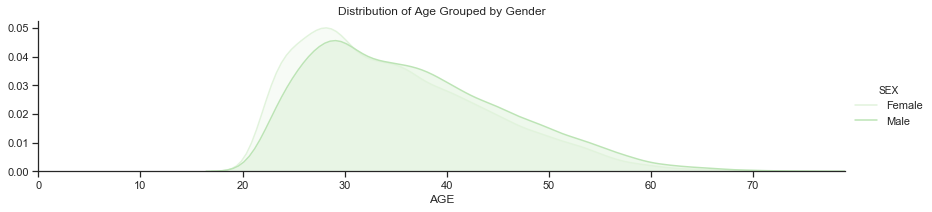

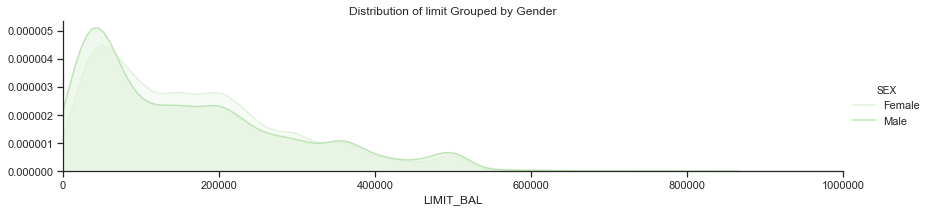

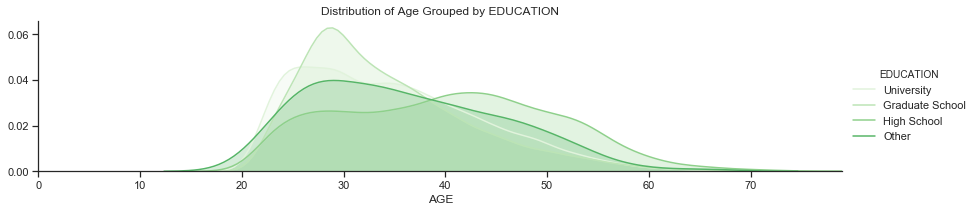

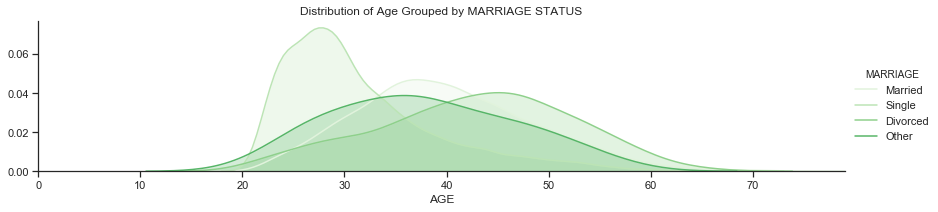

In [45]:
# make a facet grid plot of AGE and SEX
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

# make a facet grid plot of LIMIT and SEX
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of limit Grouped by Gender')
fig.add_legend()

# make a facet grid plot of AGE and EDUCATION
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by EDUCATION')
fig.add_legend()

# make a facet grid plot of AGE and MARRIAGE
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by MARRIAGE STATUS')
fig.add_legend()

# Create subsets of features to train the models on

In [46]:
# subset between 0-600000
creditLOW = credit.loc[(credit['LIMIT_BAL'] <= 600000)]

# select the predictors (LIMIT_BAL, BILL_SEP, PAID_SEP, STATUS of PAYMENT, )
# possibility: make columns with score of "INTIME"/LATE" in the last few months
# -2,-1,0,1 is seen as "INTIME" (looking at relationship between default and payment status)
# > 1 is seen as not "LATE"
# column = DELAY_SEP tm DELAY_APR = count -2,-1 0 and 1
# column2 = DELAY_SEP tm DELAY_APR = count >1 
# column/column2 = 
# run algortihm and check for variable importance

In [47]:
# change the values back into numbers 
# sex
creditLOW.SEX[creditLOW.SEX == 'Male'] = 1
creditLOW.SEX[creditLOW.SEX == 'Female'] = 2

# change the values in EDUCATION (0,4-6= Other)
creditLOW.EDUCATION[creditLOW.EDUCATION == 'Other'] = 0
creditLOW.EDUCATION[creditLOW.EDUCATION == 'Graduate School'] = 1
creditLOW.EDUCATION[creditLOW.EDUCATION == 'University'] = 2
creditLOW.EDUCATION[creditLOW.EDUCATION == 'High School'] = 3


# change the values in MARRIAGE (3= divorced 4 = other
creditLOW.MARRIAGE[creditLOW.MARRIAGE == 'Other'] = 0
creditLOW.MARRIAGE[creditLOW.MARRIAGE == 'Married'] = 1
creditLOW.MARRIAGE[creditLOW.MARRIAGE == 'Single'] = 2
creditLOW.MARRIAGE[creditLOW.MARRIAGE == 'Divorced'] = 3

# change the values of delay columns into integers
for col in ['DELAY_APR', 'DELAY_MAY', 'DELAY_JUN', 'DELAY_JUL', 'DELAY_AUG', 'DELAY_SEP']:
    creditLOW[col] = creditLOW[col].astype('int64')
    
# change the values of SEX, EDUCATION, MARRIAGE columns into integers
for col in ['SEX', 'EDUCATION', 'MARRIAGE']: creditLOW[col] = creditLOW[col].astype('int64')

# change the values in DEFAULT (0= No, 1 = Yes
creditLOW.DEFAULT[creditLOW.DEFAULT == 'No'] = 0
creditLOW.DEFAULT[creditLOW.DEFAULT == 'Yes'] = 1



In [48]:
creditLOW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29921 entries, 0 to 29999
Data columns (total 26 columns):
LIMIT_BAL    29921 non-null int64
SEX          29921 non-null int64
EDUCATION    29921 non-null int64
MARRIAGE     29921 non-null int64
AGE          29921 non-null int64
DELAY_SEP    29921 non-null int64
DELAY_AUG    29921 non-null int64
DELAY_JUL    29921 non-null int64
DELAY_JUN    29921 non-null int64
DELAY_MAY    29921 non-null int64
DELAY_APR    29921 non-null int64
BILL_SEP     29921 non-null int64
BILL_AUG     29921 non-null int64
BILL_JUL     29921 non-null int64
BILL_JUN     29921 non-null int64
BILL_MAY     29921 non-null int64
BILL_APR     29921 non-null int64
PAID_SEP     29921 non-null int64
PAID_AUG     29921 non-null int64
PAID_JUL     29921 non-null int64
PAID_JUN     29921 non-null int64
PAID_MAY     29921 non-null int64
PAID_APR     29921 non-null int64
DEFAULT      29921 non-null object
binCREDIT    29921 non-null category
binAGE       29921 non-null category


In [49]:
# recode the values of payment status
# melt DELAY_SEP tm DELAY_APR into one column
meltcreditLOW = pd.melt(creditLOW, id_vars=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_SEP', 
                                        'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR', 'PAID_SEP',
                                        'PAID_AUG','PAID_JUL','PAID_JUN','PAID_MAY','PAID_APR','DEFAULT'], 
        value_vars=['DELAY_SEP','DELAY_AUG','DELAY_JUL','DELAY_JUN','DELAY_MAY','DELAY_APR'], 
                     var_name='MONTH', value_name='TIME')


In [51]:
# change the values (0= in time payment | 1= late payment)
meltcreditLOW.TIME[meltcreditLOW.TIME == -2] = 0
meltcreditLOW.TIME[meltcreditLOW.TIME == -1] = 0
meltcreditLOW.TIME[meltcreditLOW.TIME == 0] = 0
meltcreditLOW.TIME[meltcreditLOW.TIME == 1] = 1
meltcreditLOW.TIME[meltcreditLOW.TIME == 2] = 1
meltcreditLOW.TIME[meltcreditLOW.TIME == 3] = 1
meltcreditLOW.TIME[meltcreditLOW.TIME == 4] = 1
meltcreditLOW.TIME[meltcreditLOW.TIME == 5] = 1
meltcreditLOW.TIME[meltcreditLOW.TIME == 6] = 1
meltcreditLOW.TIME[meltcreditLOW.TIME == 7] = 1
meltcreditLOW.TIME[meltcreditLOW.TIME == 8] = 1


In [52]:
#Generate a variable that gives the value for the average amount of the bill over the months
meltcreditLOW['MEAN_BILL'] = ((meltcreditLOW.BILL_APR +
            meltcreditLOW.BILL_MAY +
            meltcreditLOW.BILL_JUN +
            meltcreditLOW.BILL_JUL +
            meltcreditLOW.BILL_AUG +
            meltcreditLOW.BILL_SEP) / 6)

#Generate a variable that gives the value for the average amount paid over the months
meltcreditLOW['MEAN_PAID'] = ((meltcreditLOW.PAID_APR +
            meltcreditLOW.PAID_MAY +
            meltcreditLOW.PAID_JUN +
            meltcreditLOW.PAID_JUL +
            meltcreditLOW.PAID_AUG +
            meltcreditLOW.PAID_SEP) / 6)


In [54]:
# change the text into numbers
meltcreditLOW.MONTH[meltcreditLOW.MONTH == 'DELAY_APR'] = 4
meltcreditLOW.MONTH[meltcreditLOW.MONTH == 'DELAY_MAY'] = 5
meltcreditLOW.MONTH[meltcreditLOW.MONTH == 'DELAY_JUN'] = 6
meltcreditLOW.MONTH[meltcreditLOW.MONTH == 'DELAY_JUL'] = 7
meltcreditLOW.MONTH[meltcreditLOW.MONTH == 'DELAY_AUG'] = 8
meltcreditLOW.MONTH[meltcreditLOW.MONTH == 'DELAY_SEP'] = 9


# change the values of SEX, EDUCATION, MARRIAGE columns into integers
for col in ['MEAN_PAID', 'MEAN_BILL']: meltcreditLOW[col] = meltcreditLOW[col].astype('int64')

0    139746
1     39780
Name: DEFAULT, dtype: int64

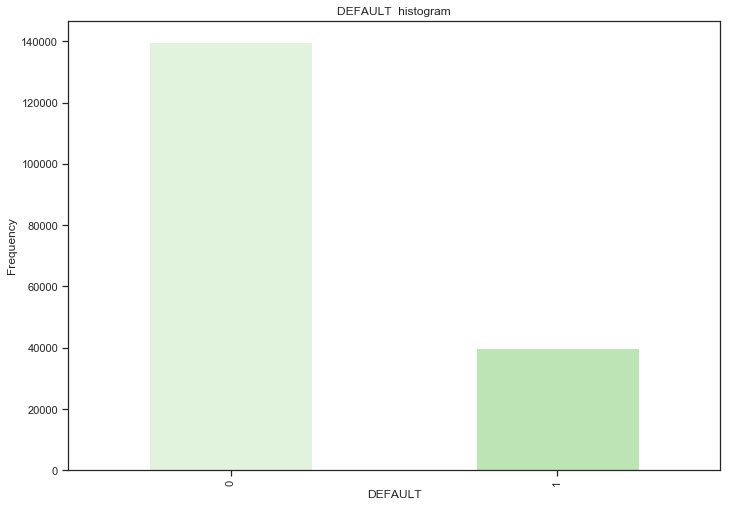

In [56]:
# check the balans 
pd.value_counts(meltcreditLOW['DEFAULT']).plot.bar()
plt.title('DEFAULT  histogram')
plt.xlabel('DEFAULT')
plt.ylabel('Frequency')
meltcreditLOW['DEFAULT'].value_counts()

In [55]:
# save your subset and the complete, but processed dataset to CSV
meltcreditLOW.to_csv("meltcreditLOW.csv")
creditLOW.to_csv("creditLOW.csv")
credit.to_csv("creditProcessed.csv")

In [ ]:
# check for balans in DEFAULT in the next script
# run a classification on DEFAULT
# run a classification on recoded INTIME/LATE